In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../python')
from functions import *
from models import *
import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "0" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2023-03-08 08:40:50.045434: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-03-08 08:40:50.077212: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA A40 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 84 deviceMemorySize: 44.56GiB deviceMemoryBandwidth: 648.29GiB/s
2023-03-08 08:40:50.078044: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-03-08 08:40:50.081743: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-03-08 08:40:50.085032: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-03-08 08:40:50.085820: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-0

# One mock stream

In [ ]:
save_folder = "mock"

if save_folder is not None: 
    os.makedirs(save_folder, exist_ok=True)

### Load data

In [ ]:
file = "../gaia_data/mock_streams/gaiamock_ra156.2_dec57.5_stream_feh-1.6_v3_863.npy"
df = pd.DataFrame(np.load(file), columns = ["μ_δ", "μ_α", "δ", "α", "b-r", "g", "ϕ", "λ", "μ_ϕcosλ", "μ_λ", 'stream'])
df['α_wrapped'] = df['α'].apply(lambda x: x if x > 100 else x + 360)
df['stream'] = df['stream']/100
df['stream'] = df['stream'].astype(bool)

In [ ]:
make_plots(df, save_folder = save_folder)

In [ ]:
df_slice = signal_sideband(df, save_folder = save_folder, sr_factor=0.25, sb_factor=0.5)

## Train

In [ ]:
tf.keras.backend.clear_session()
test = train(df_slice, verbose=False, save_folder = save_folder)

# Now do this for 100 mock streams

In [3]:
n_streams = 3

import random
mock_streams = glob("../gaia_data/mock_streams/gaiamock_*.npy")
selected_streams = random.sample(mock_streams, n_streams)

  0%|          | 0/3 [00:00<?, ?it/s]

SR factor: 0.25
SB factor: 0.5
Scanning over μ_λ
Sideband region: [-11.8,-11.6) & (-11.2,-11.0]
Signal region: [-11.6,-11.2]
Total counts: SR = 7,421, SB = 7,399
Signal region has 187 stream and 7,234 bkg events (2.59%).
Sideband region has 343 stream and 14,477 bkg events (2.37%).
f_sig = 1.1X f_sideband.


2023-03-08 08:41:20.450348: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2023-03-08 08:41:20.461639: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2994330000 Hz
2023-03-08 08:41:20.463323: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55d8ba91a500 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-03-08 08:41:20.463366: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-03-08 08:41:20.592281: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55d8ba984500 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-08 08:41:20.592357: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A40, Compute Capability 8.6
2023-03-08 08:41:20.593602: I tenso

Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...


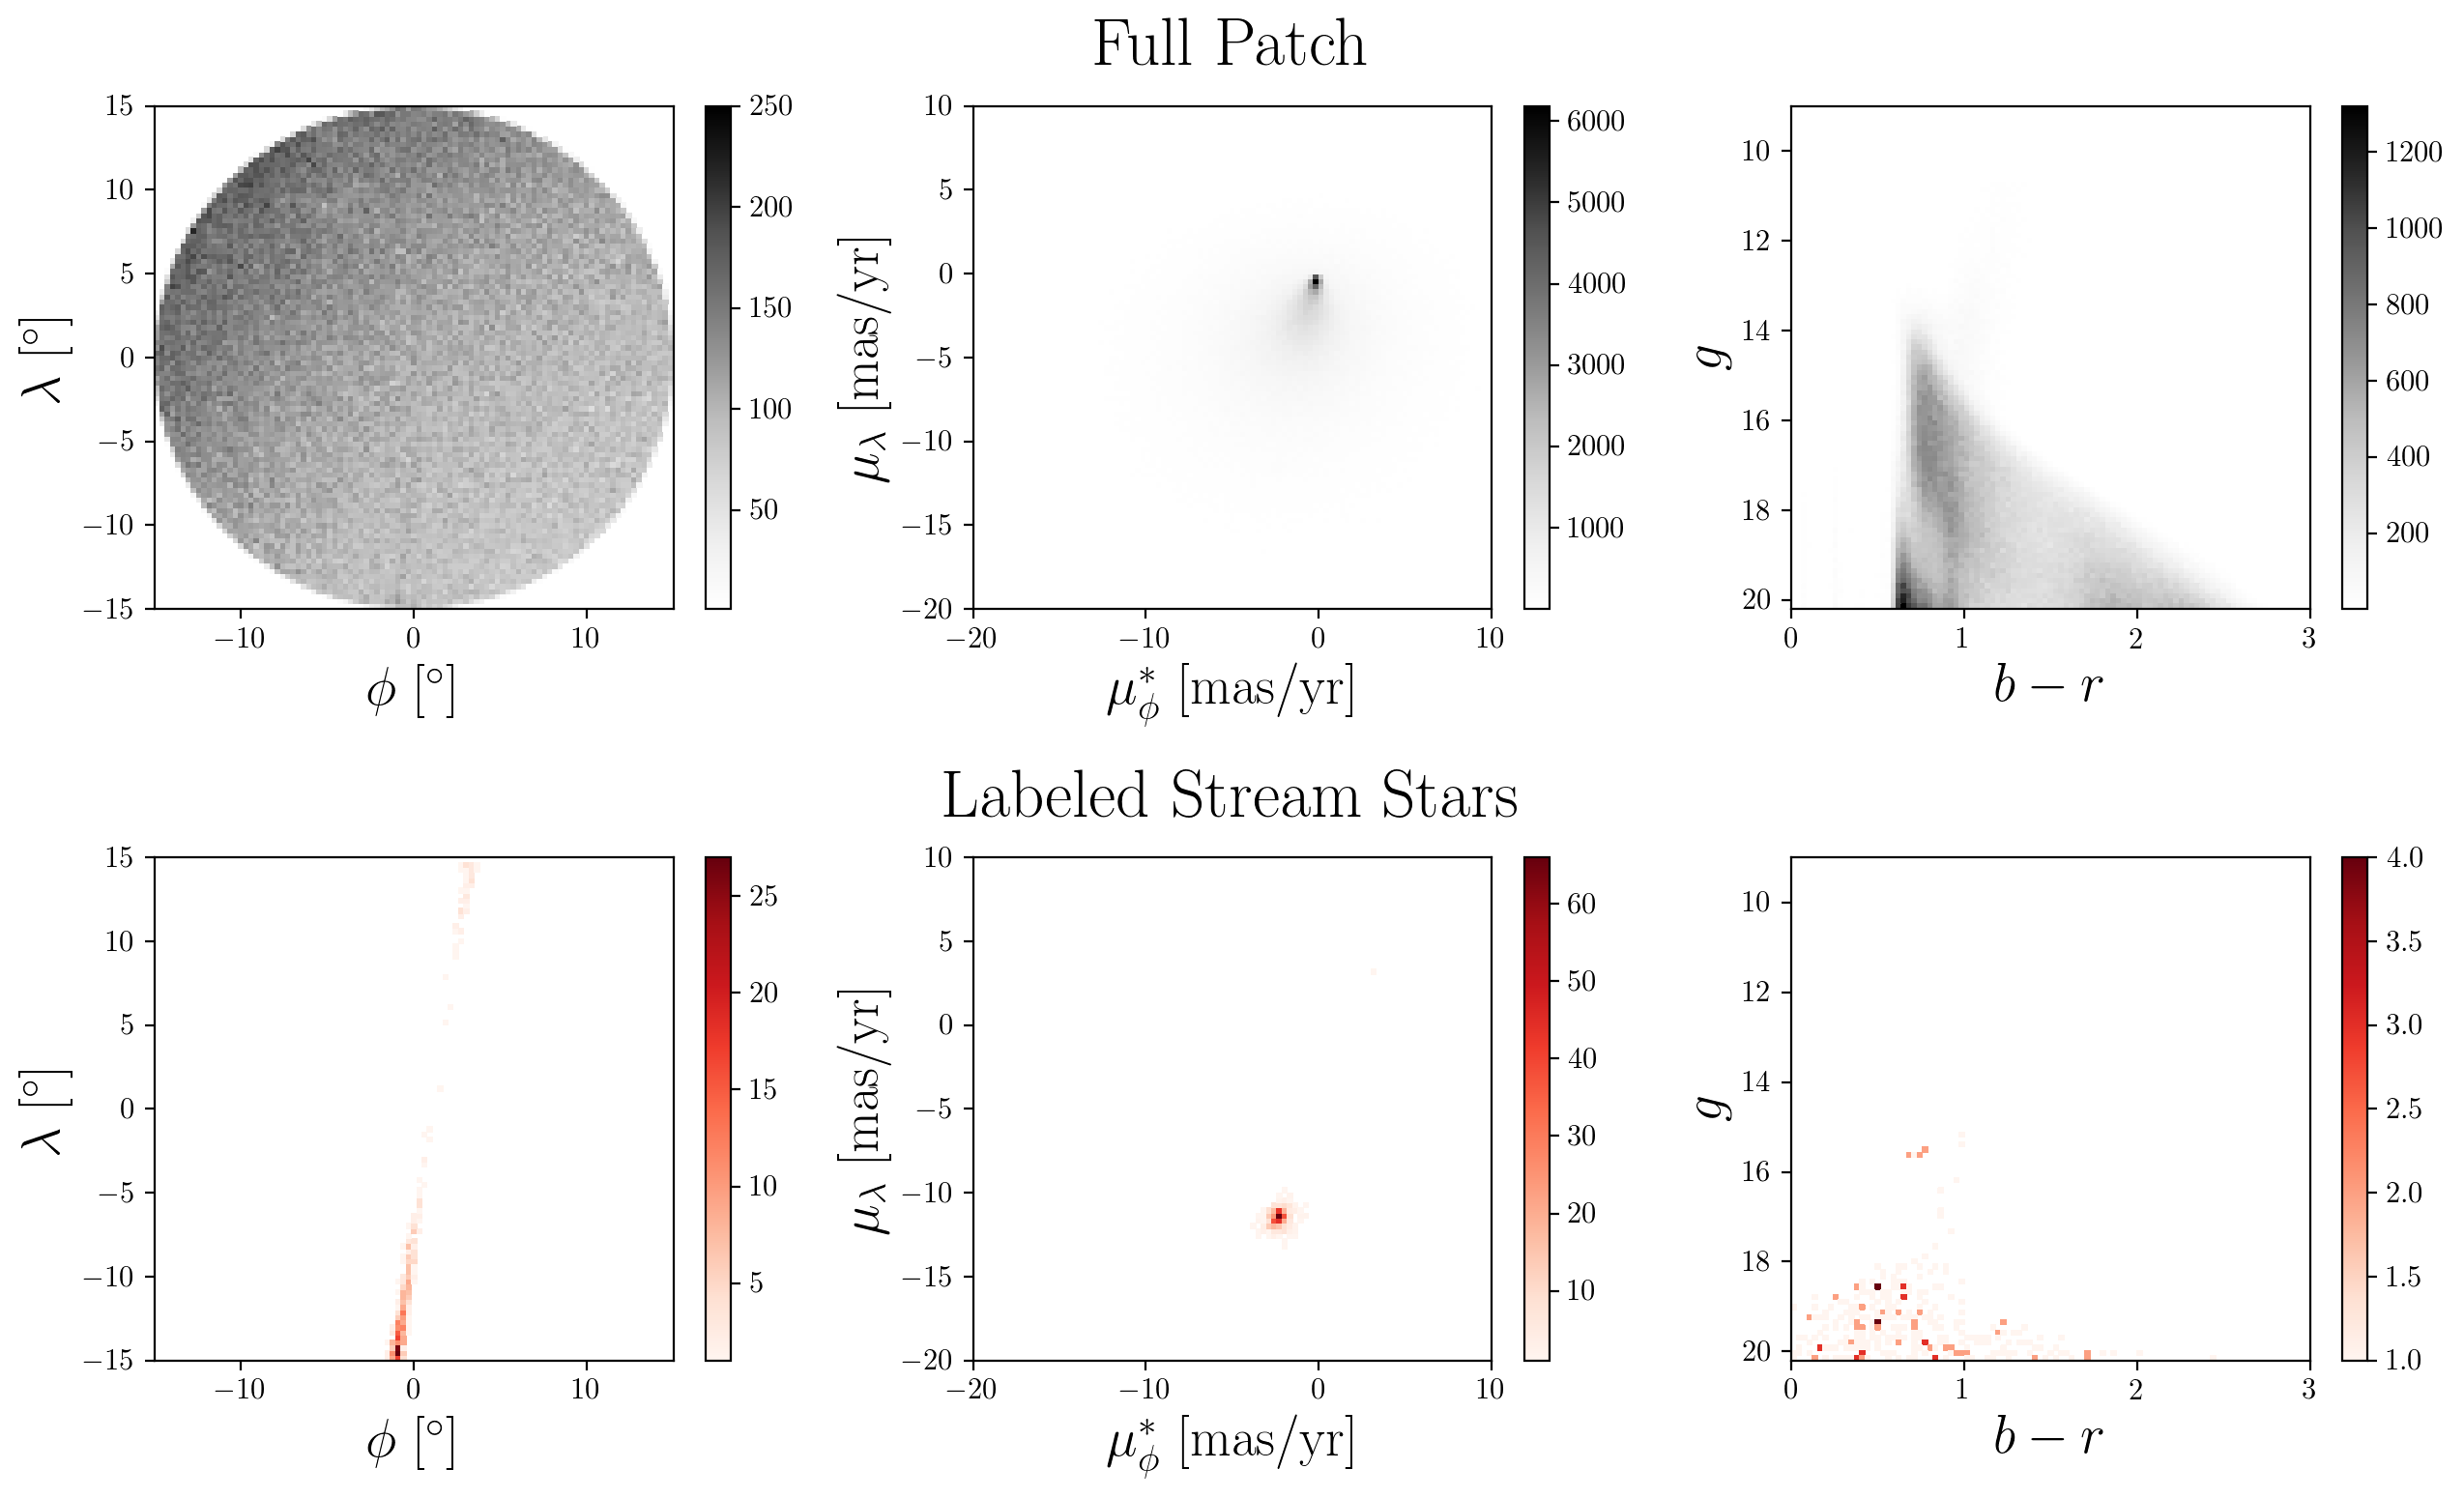

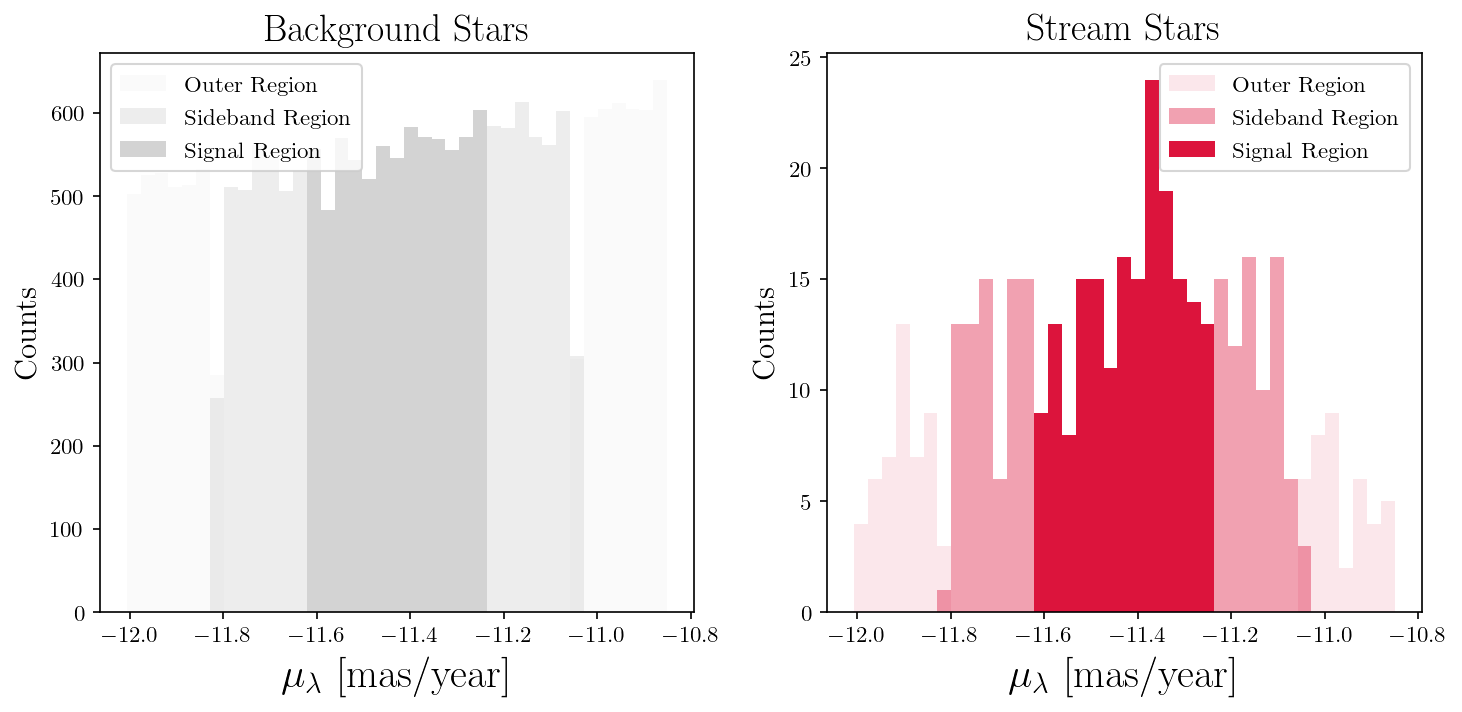

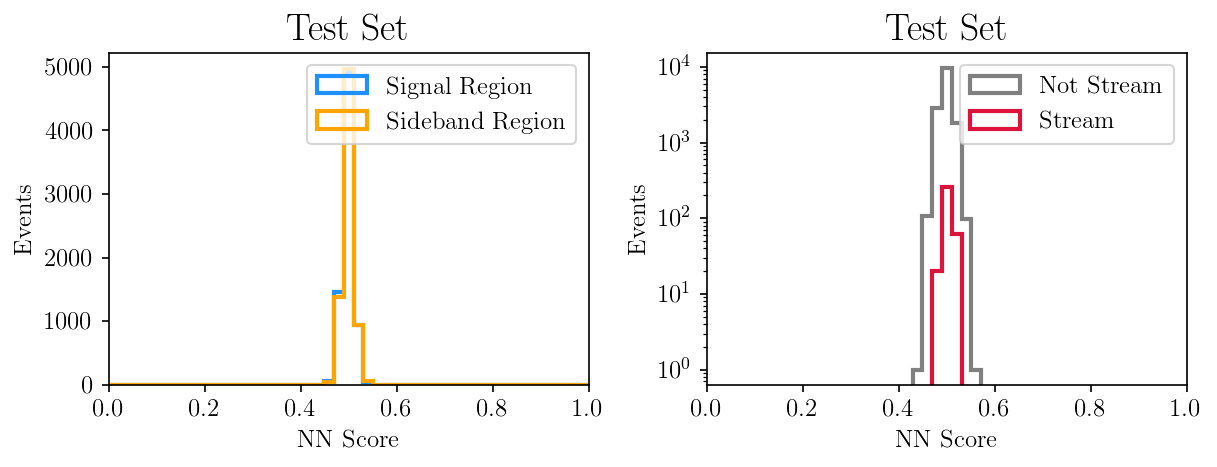

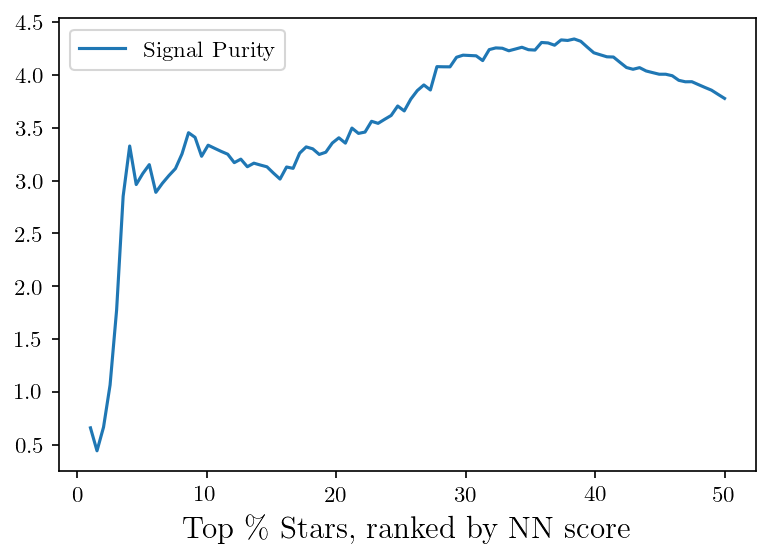

Top 50 stars: Purity = 0.0% 


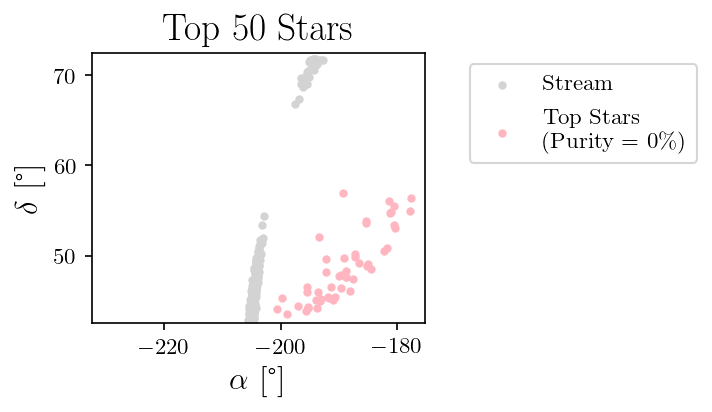

Top 100 stars: Purity = 0.0% 


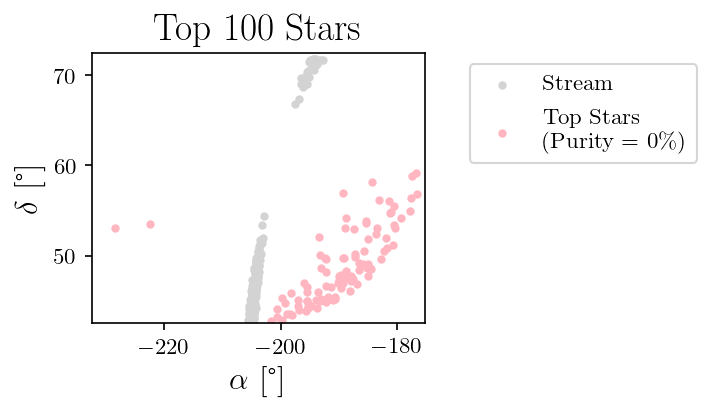

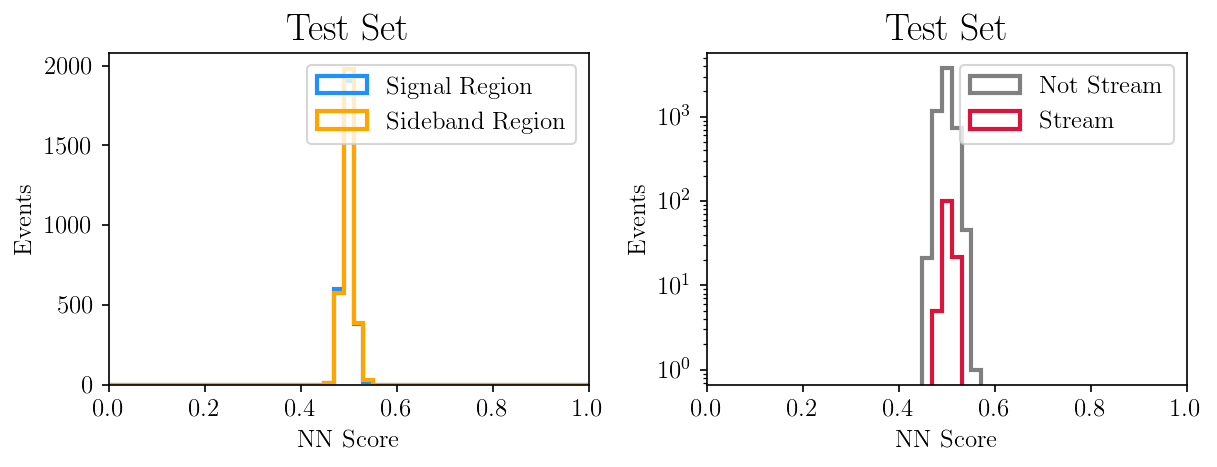

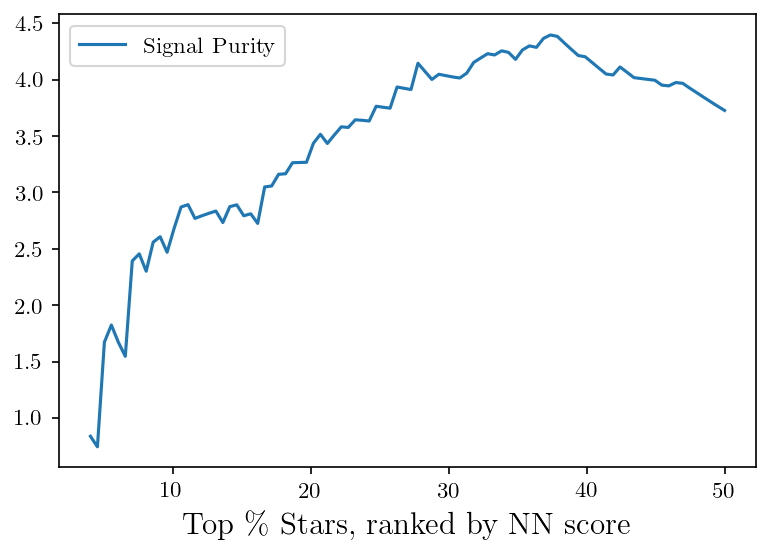

Top 50 stars: Purity = 0.0% 


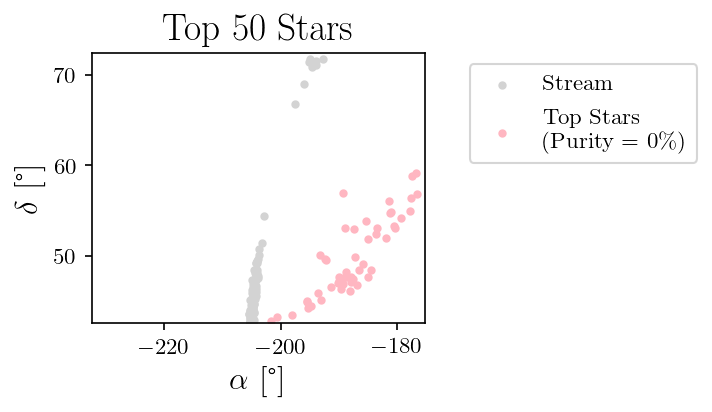

Top 100 stars: Purity = 0.0% 


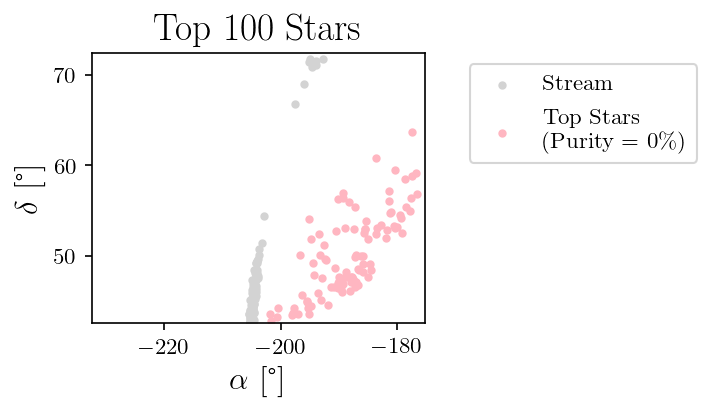

 33%|███▎      | 1/3 [08:37<17:15, 517.80s/it]

SR factor: 0.25
SB factor: 0.5
Scanning over μ_λ
Sideband region: [3.9,4.5) & (5.5,6.0]
Signal region: [4.5,5.5]
Total counts: SR = 6,131, SB = 6,231
Signal region has 184 stream and 5,947 bkg events (3.09%).
Sideband region has 225 stream and 12,137 bkg events (1.85%).
f_sig = 1.7X f_sideband.
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...


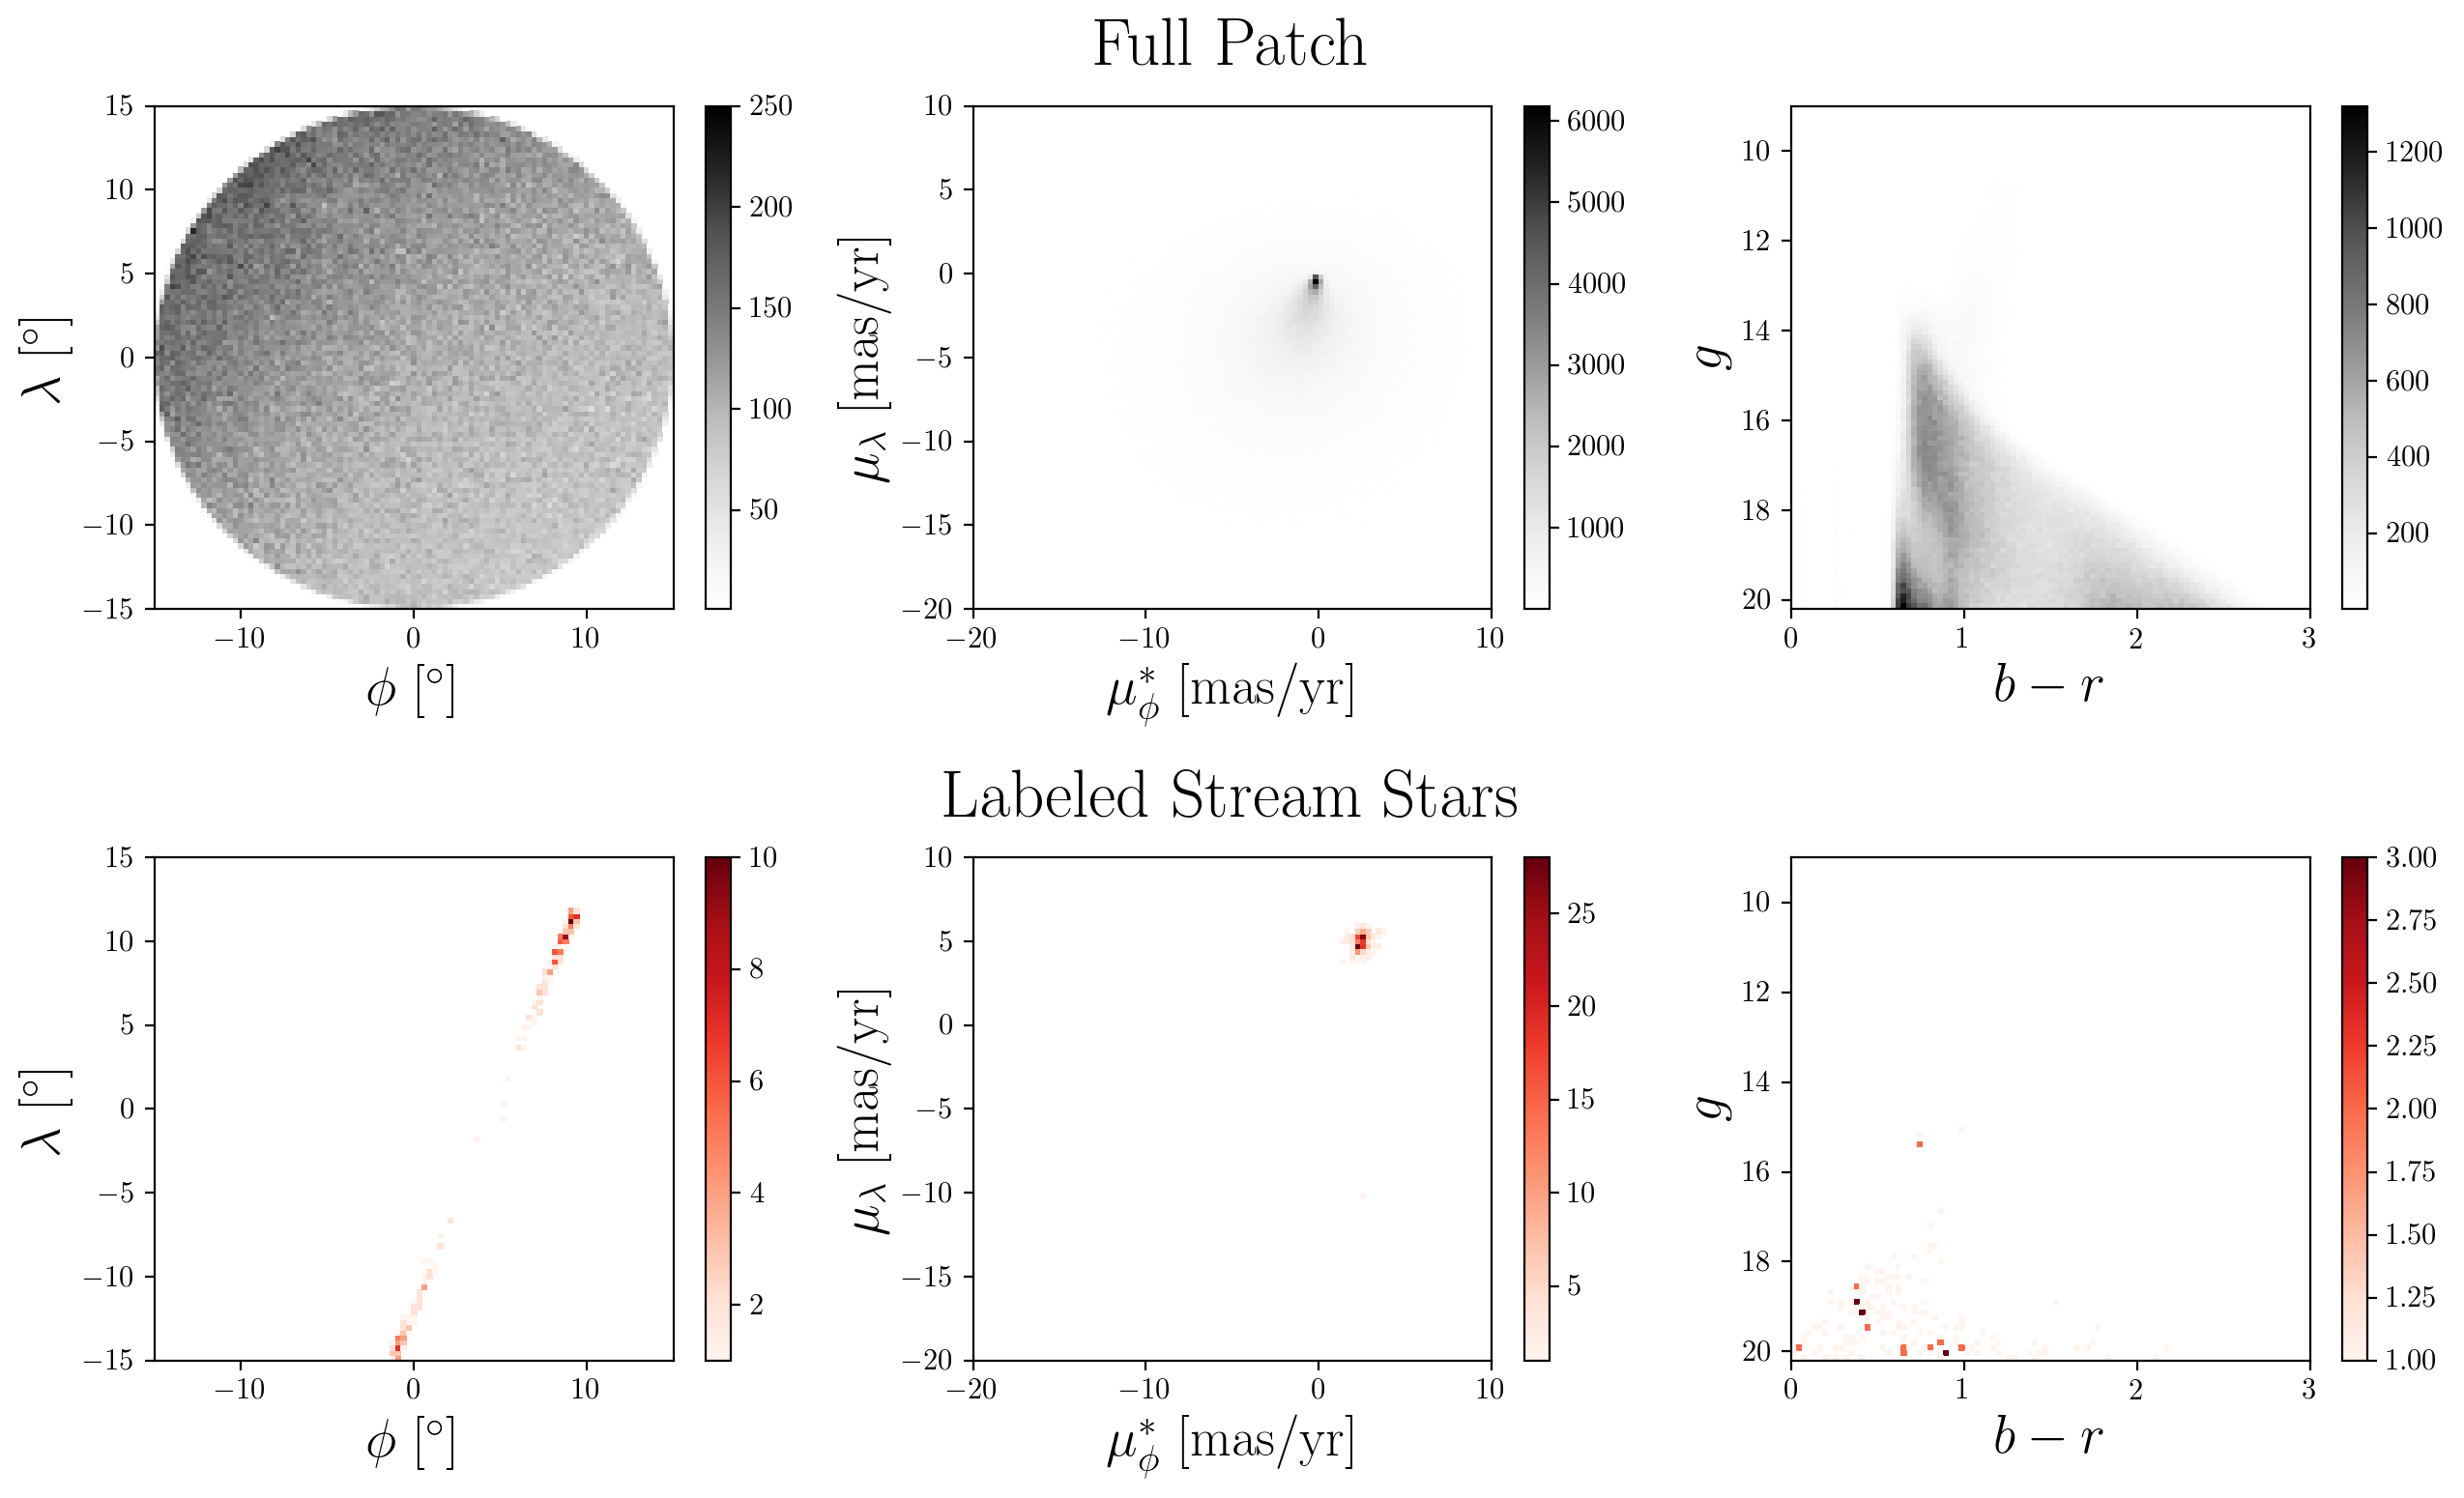

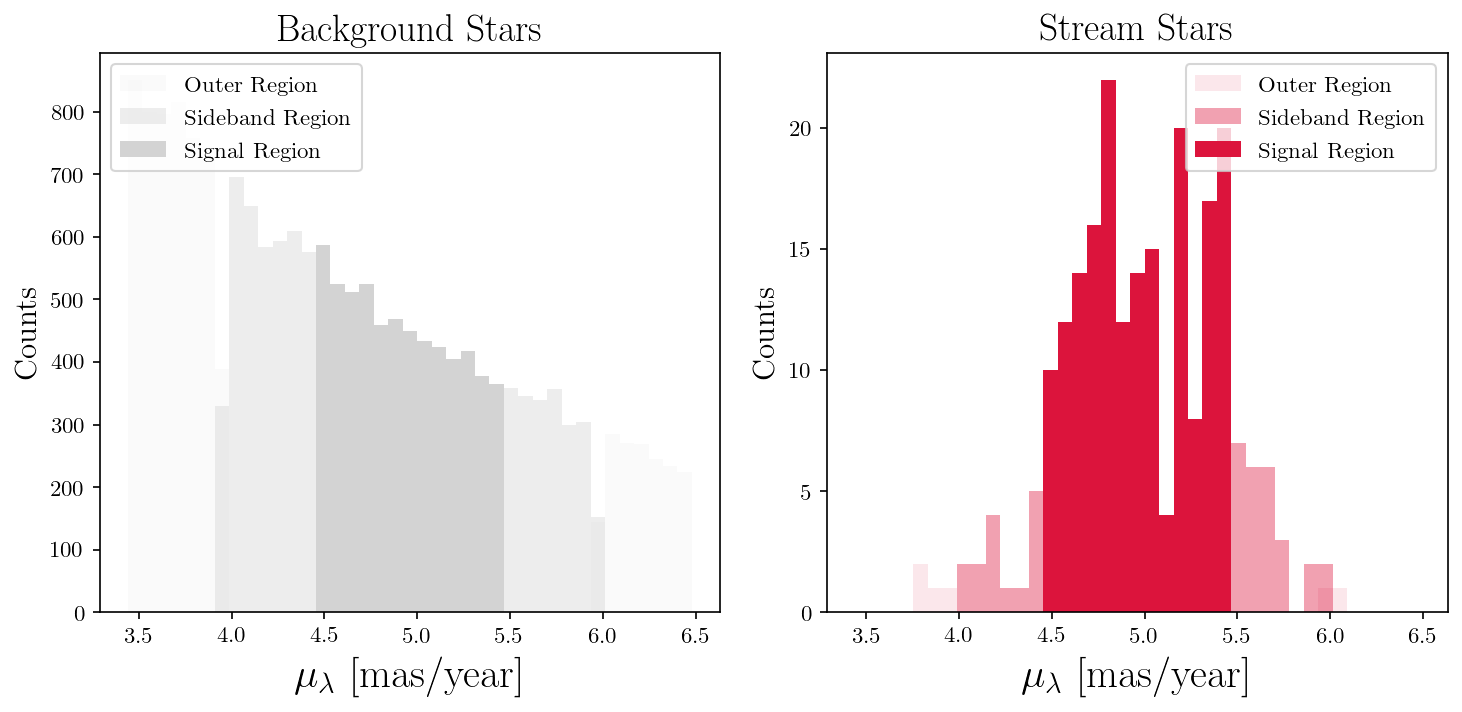

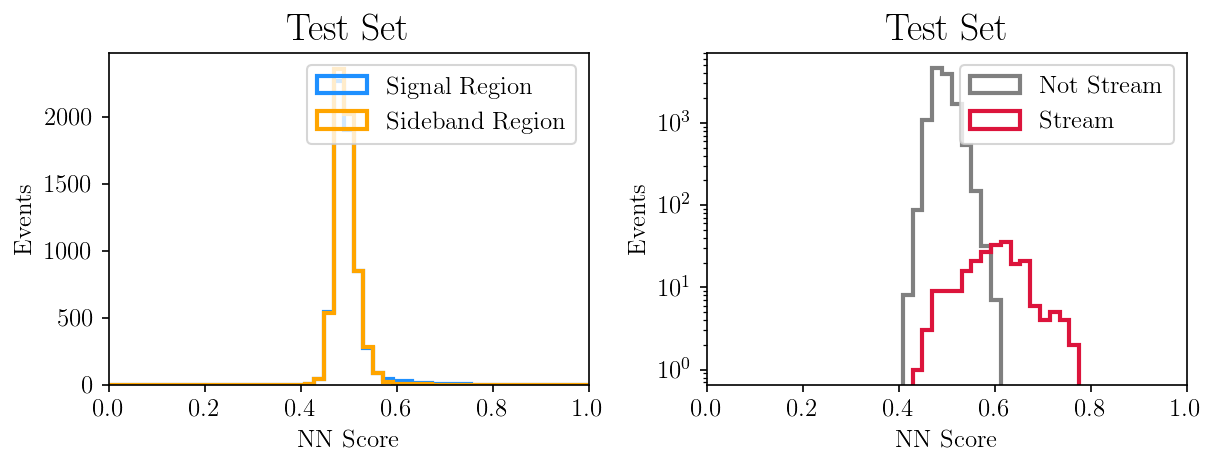

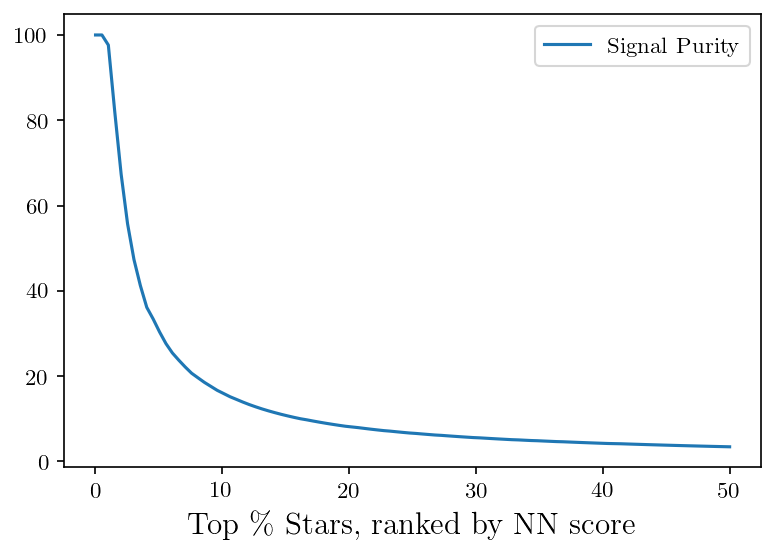

Top 50 stars: Purity = 100.0% 


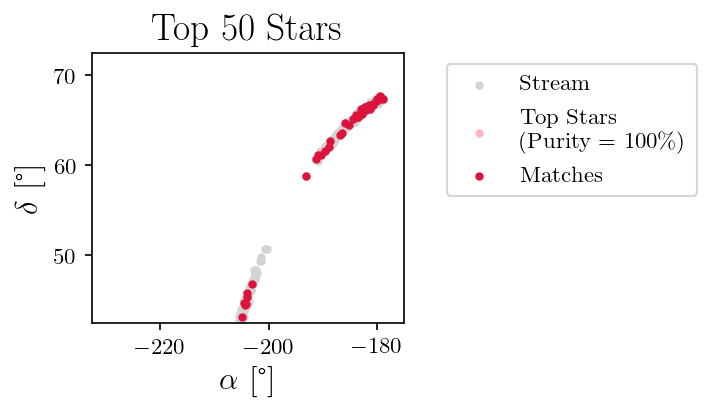

Top 100 stars: Purity = 100.0% 


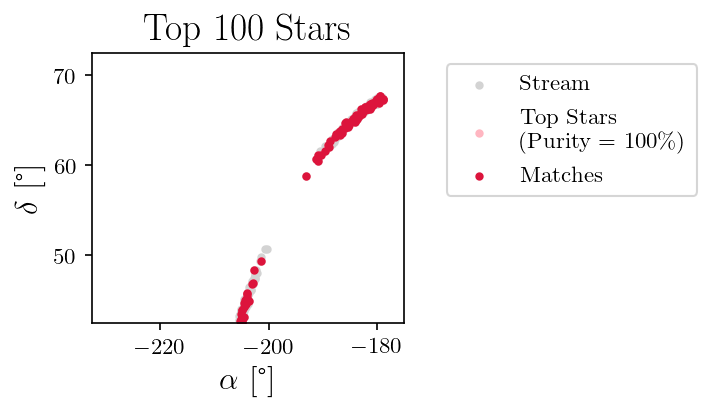

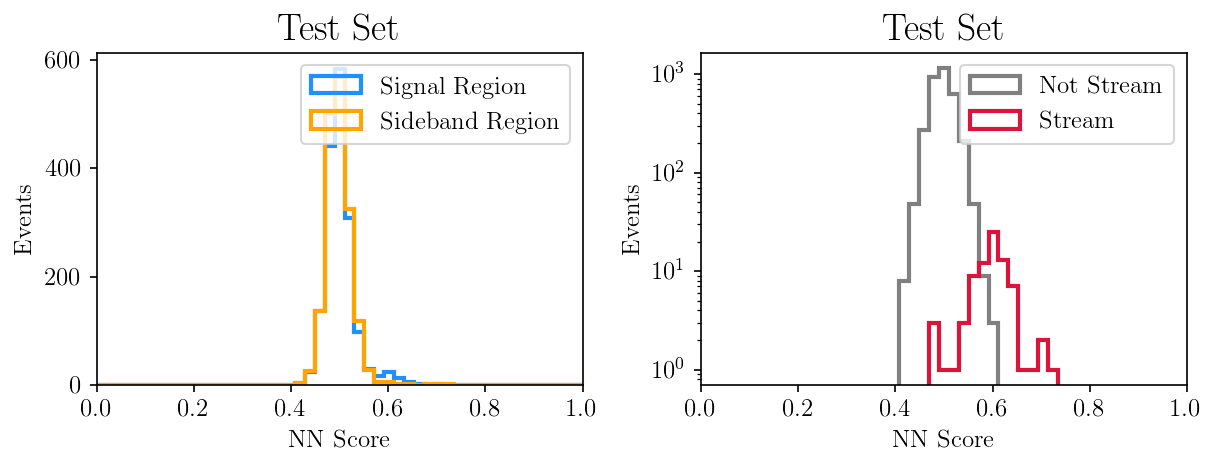

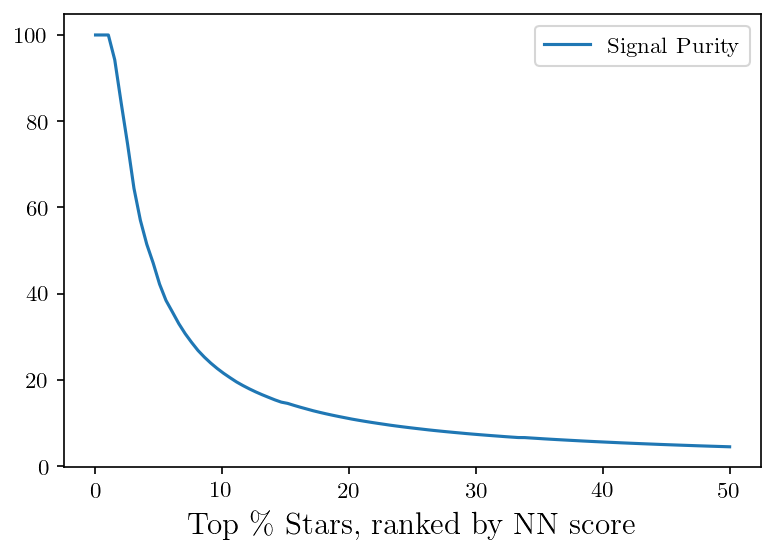

Top 50 stars: Purity = 94.0% 


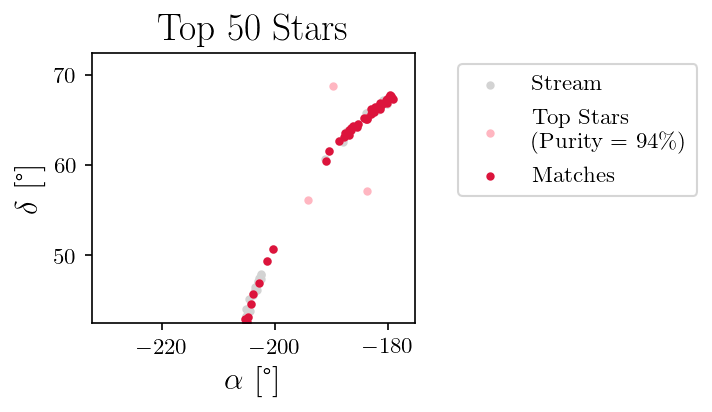

Top 100 stars: Purity = 66.0% 


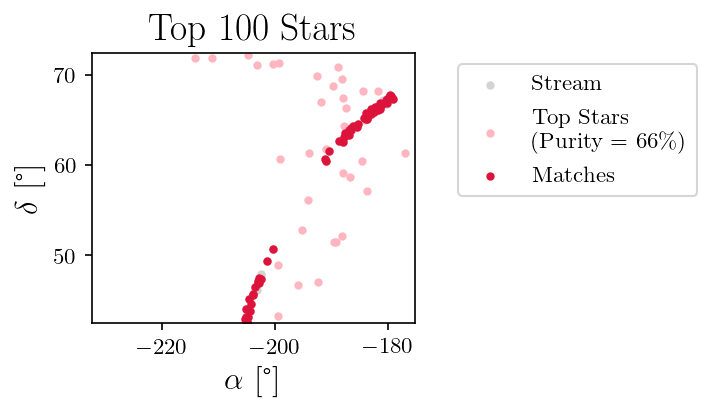

 67%|██████▋   | 2/3 [11:43<05:22, 322.30s/it]

SR factor: 0.25
SB factor: 0.5
Scanning over μ_λ
Sideband region: [-0.4,-0.3) & (-0.1,0.0]
Signal region: [-0.3,-0.1]
Total counts: SR = 13,599, SB = 12,706
Signal region has 59 stream and 13,540 bkg events (0.44%).
Sideband region has 101 stream and 26,204 bkg events (0.39%).
f_sig = 1.1X f_sideband.
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...


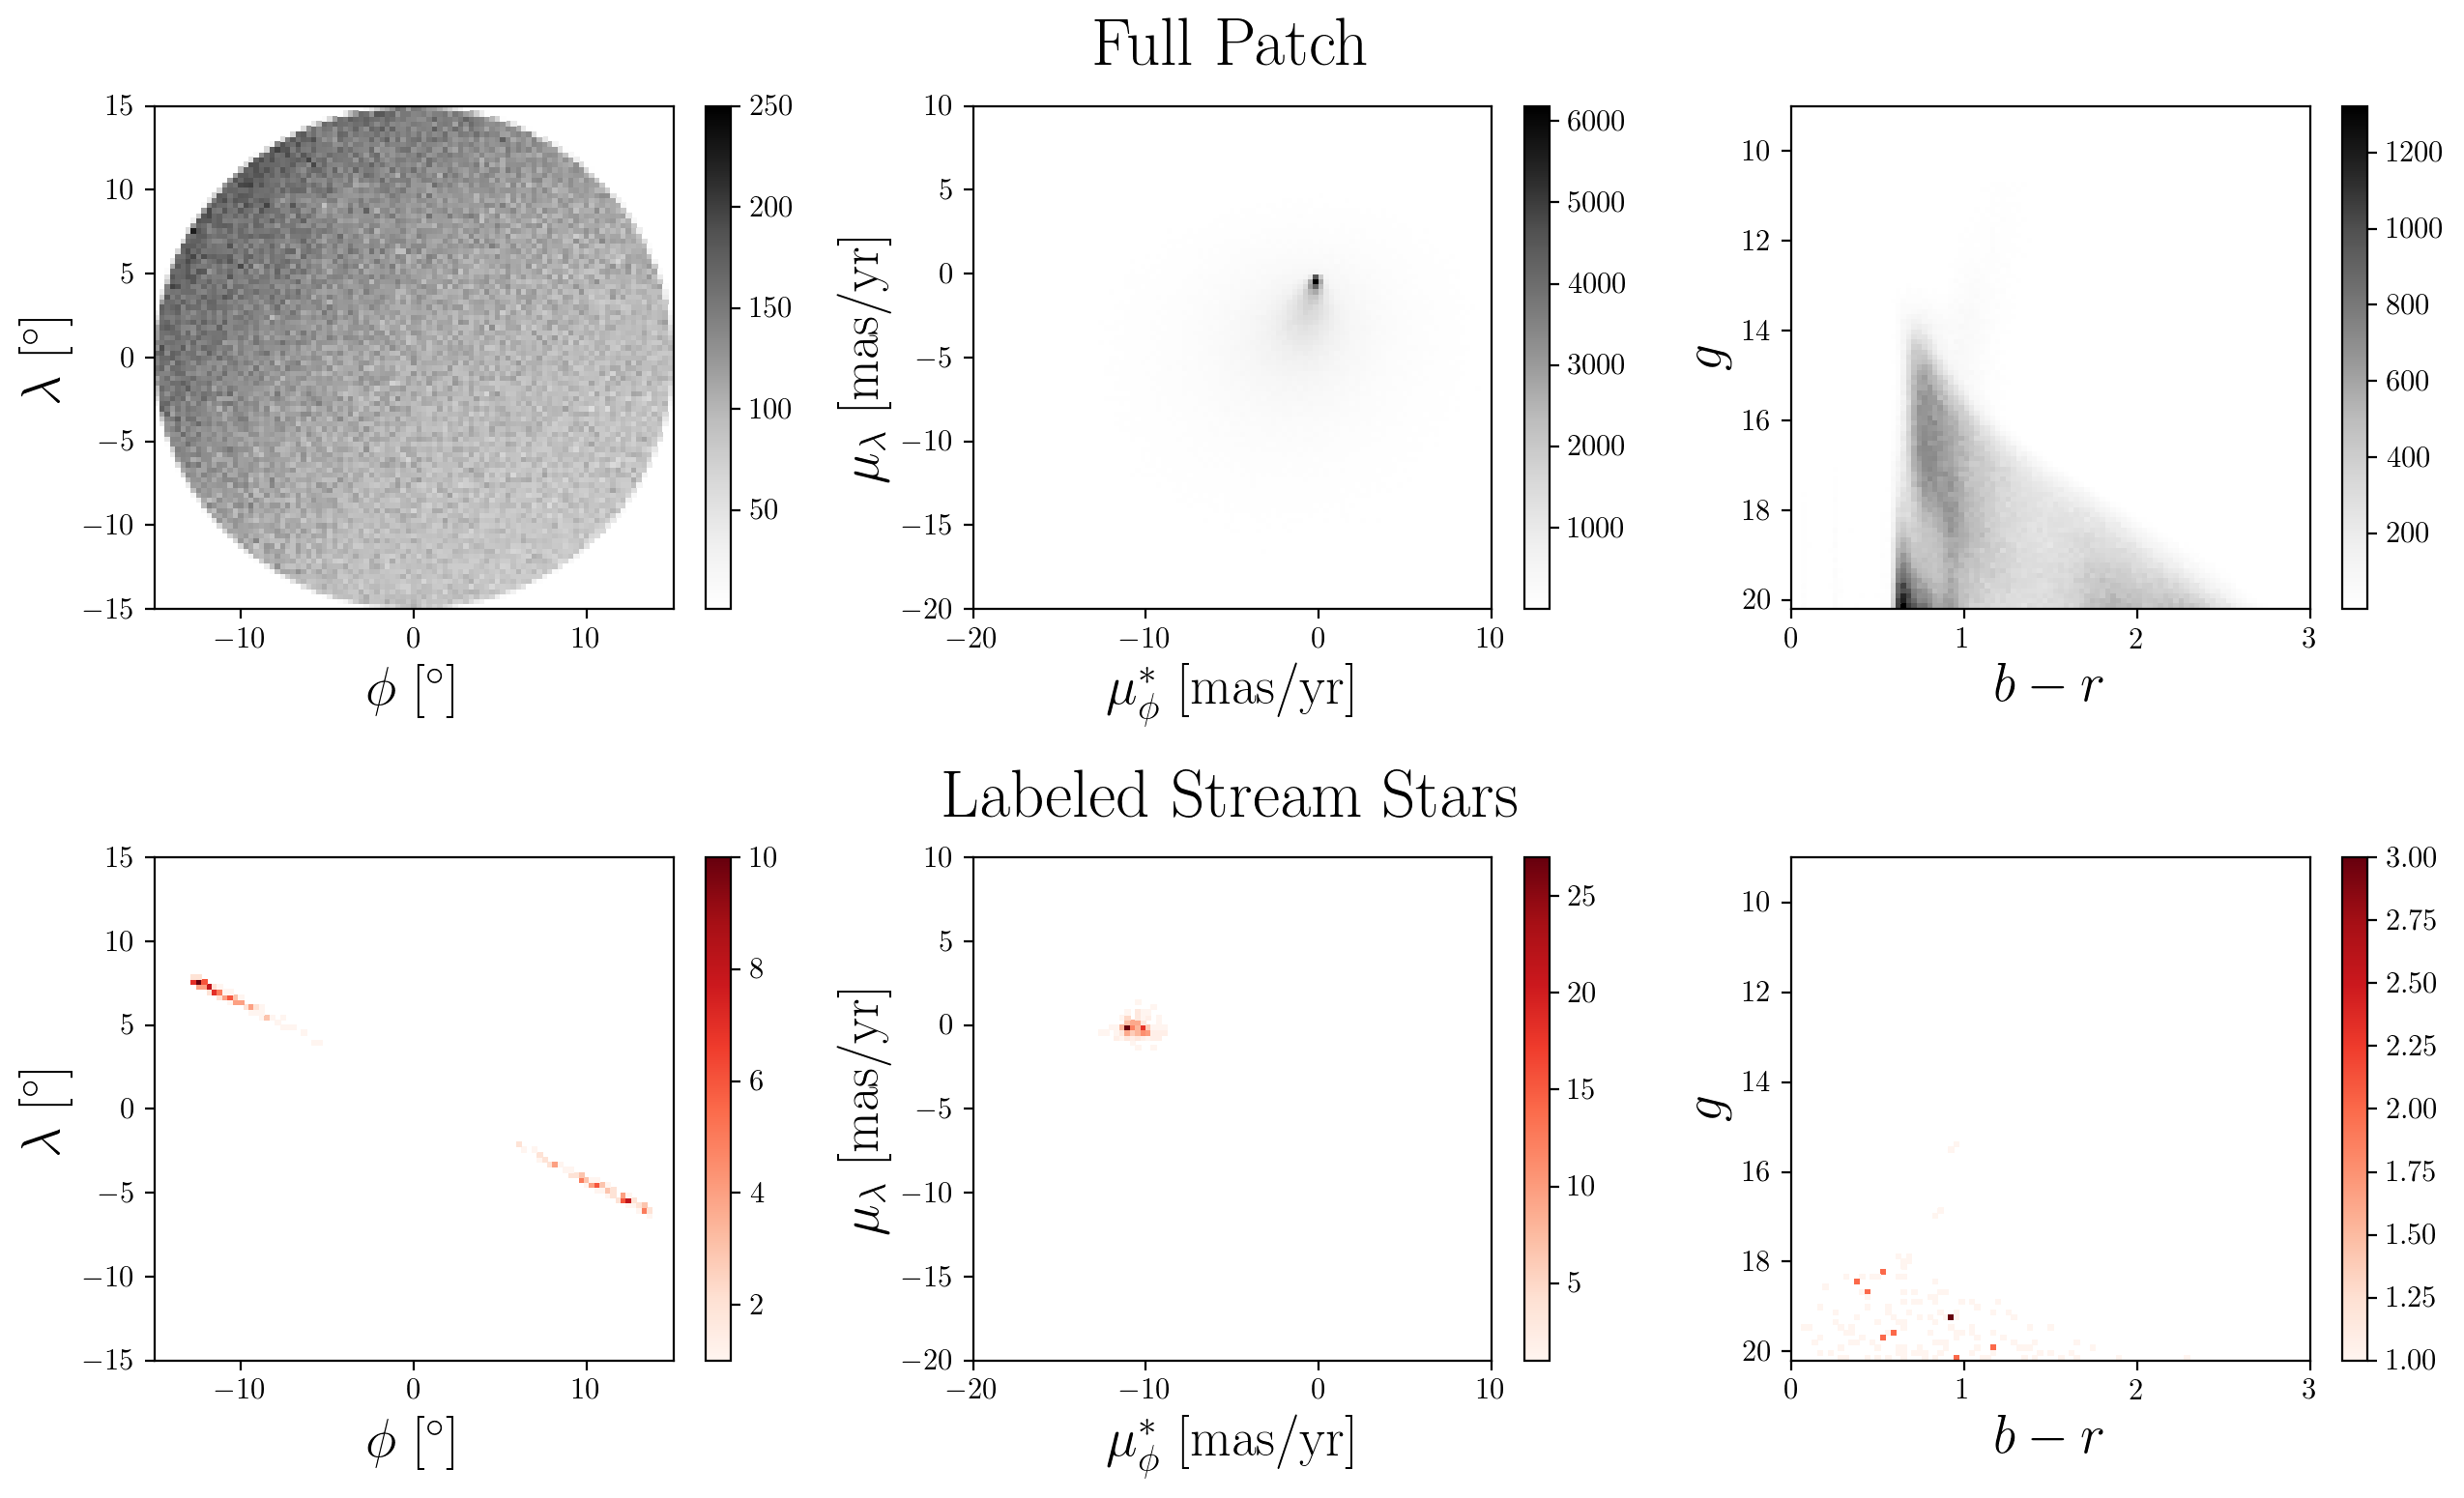

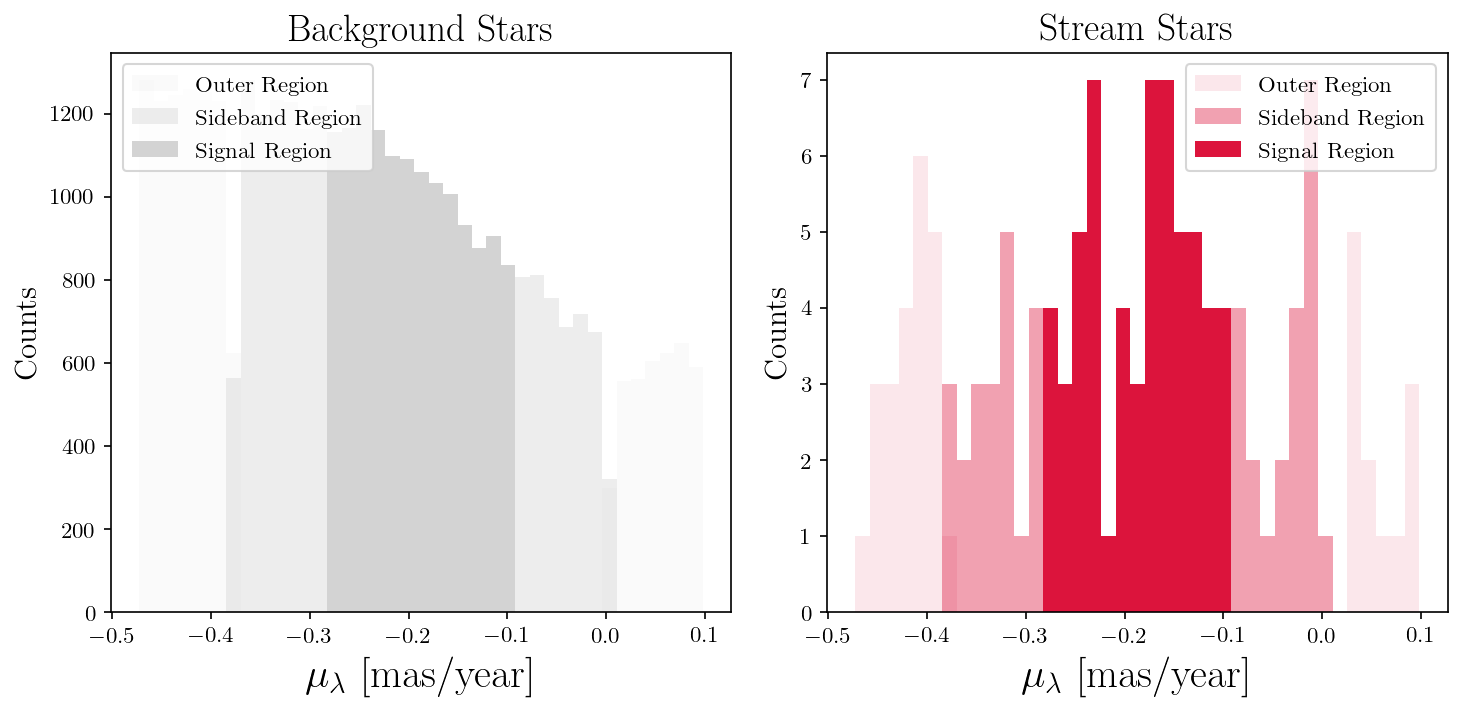

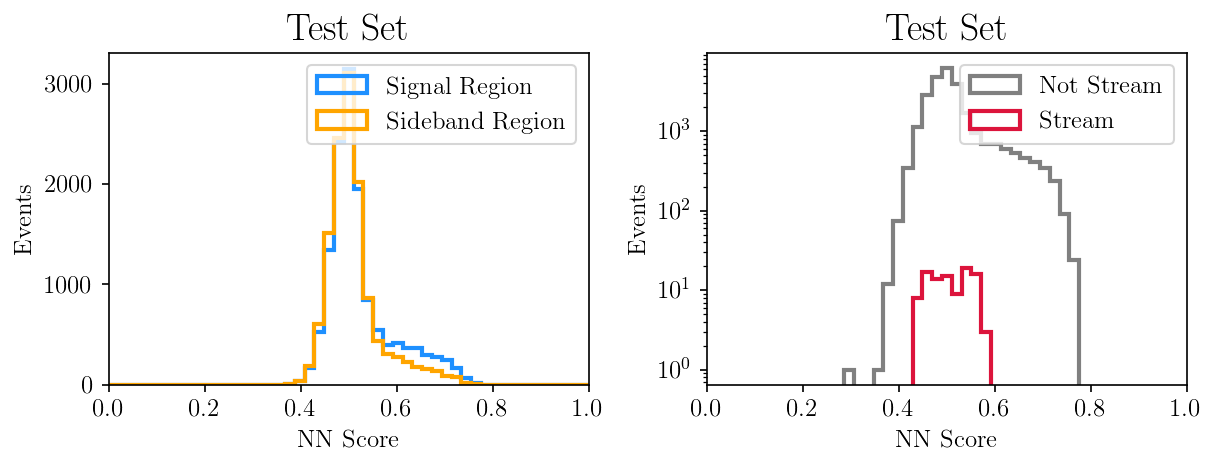

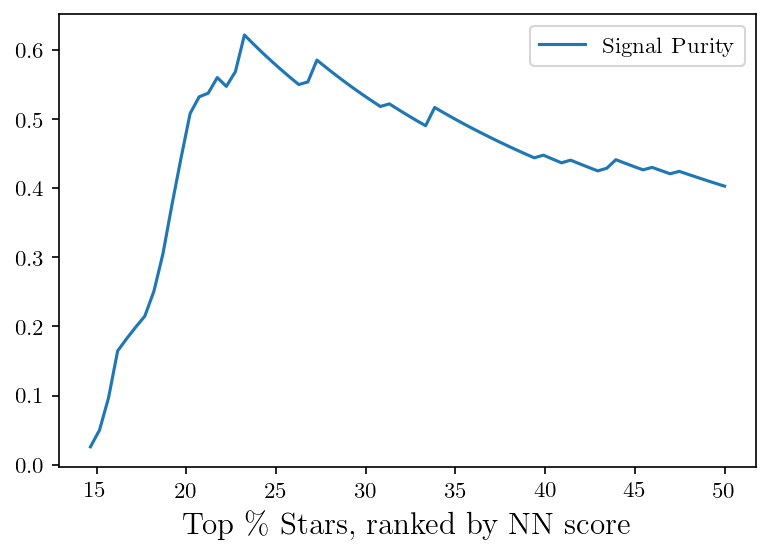

Top 50 stars: Purity = 0.0% 


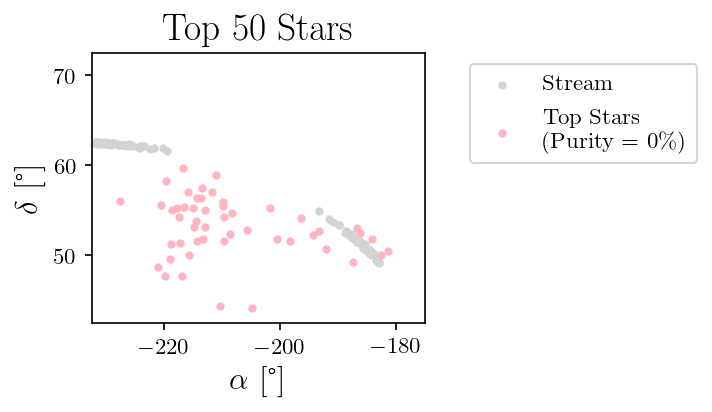

Top 100 stars: Purity = 0.0% 


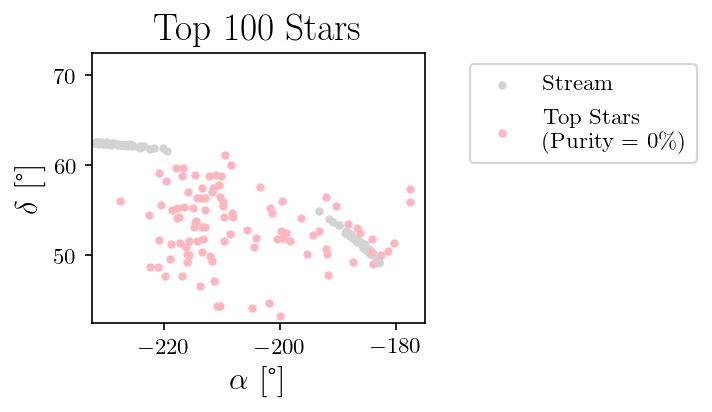

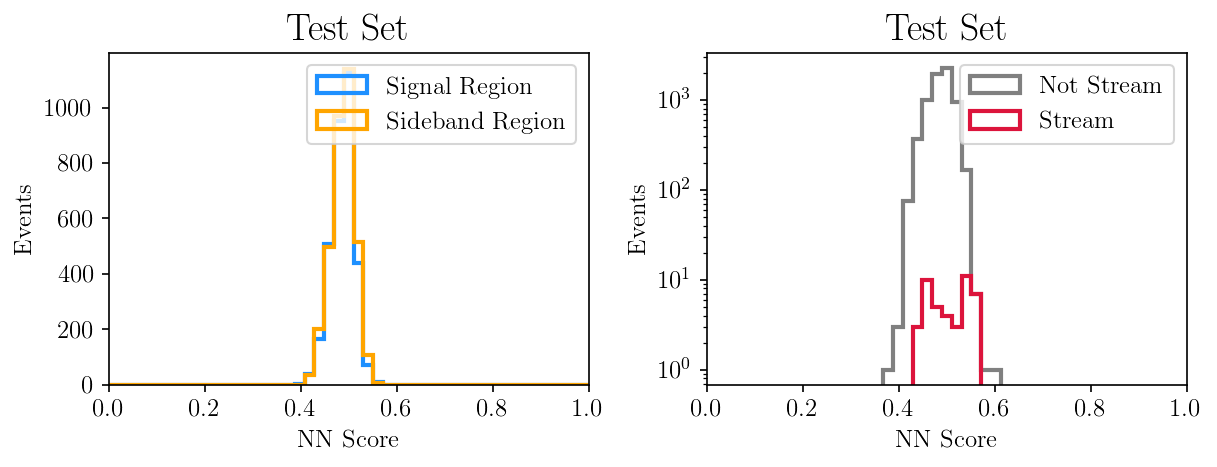

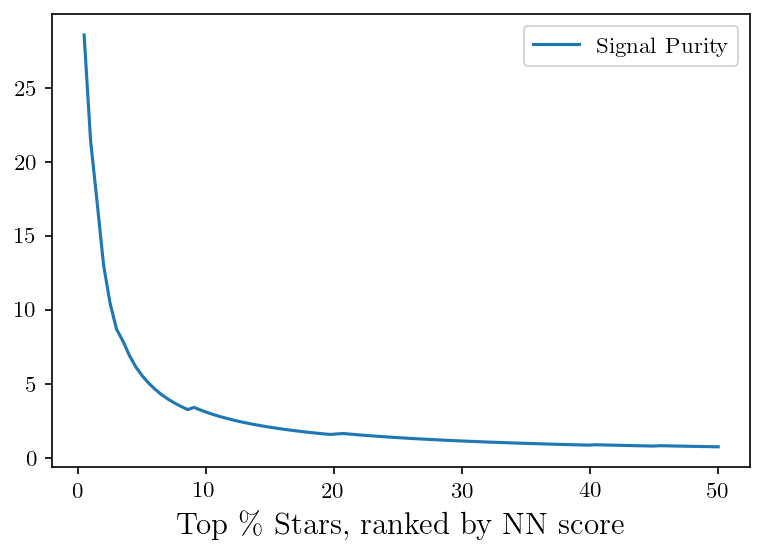

Top 50 stars: Purity = 26.0% 


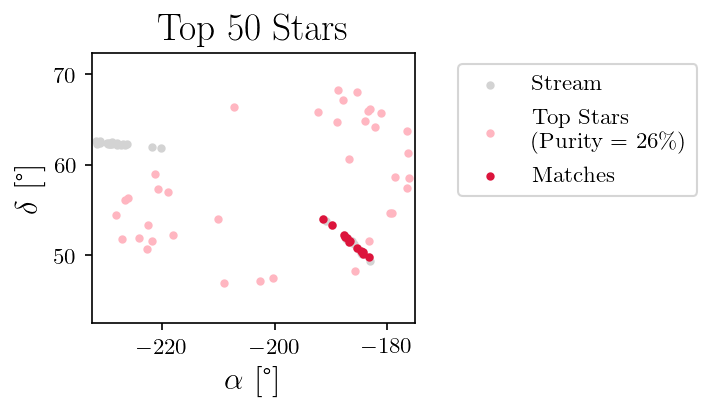

Top 100 stars: Purity = 18.0% 


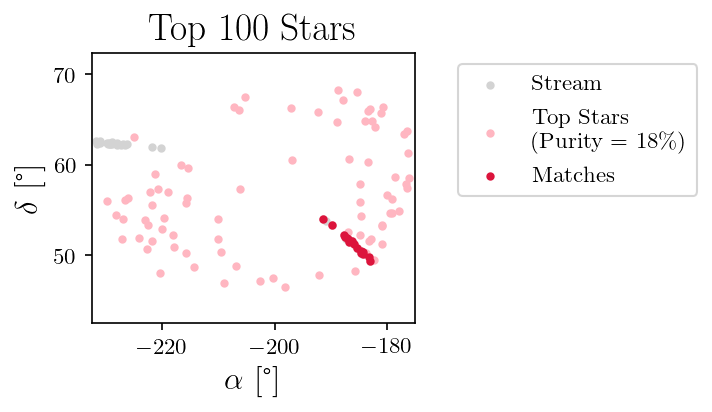

100%|██████████| 3/3 [17:05<00:00, 341.69s/it]


In [4]:
for file in tqdm(selected_streams):
    save_folder = "mocks/mock_"+str(selected_streams.index(file))
    
    if save_folder is not None: 
        os.makedirs(save_folder, exist_ok=True)

    df = pd.DataFrame(np.load(file), columns = ["μ_δ", "μ_α", "δ", "α", "b-r", "g", "ϕ", "λ", "μ_ϕcosλ", "μ_λ", 'stream'])
    df['α_wrapped'] = df['α'].apply(lambda x: x if x > 100 else x + 360)
    df['stream'] = df['stream']/100
    df['stream'] = df['stream'].astype(bool)

    make_plots(df, save_folder = save_folder)

    df_slice = signal_sideband(df, save_folder = save_folder, sr_factor=0.25, sb_factor=0.5)

    tf.keras.backend.clear_session()
    test = train(df_slice, verbose=False, save_folder = save_folder)

In [21]:
outputs = glob("./mocks/mock_*/after_fiducial_cuts/top_50_stars_purity*.pdf")

In [22]:
outputs

['./mocks/mock_0/after_fiducial_cuts/top_50_stars_purity_0.pdf',
 './mocks/mock_1/after_fiducial_cuts/top_50_stars_purity_94.pdf',
 './mocks/mock_2/after_fiducial_cuts/top_50_stars_purity_26.pdf']

In [23]:
purities = [int(file.split('_')[-1][:-4]) for file in outputs]

In [24]:
purities

[0, 94, 26]

In [25]:
np.mean(purities)

40.0

'647'